# Retificador de onda completa (Carga R/C)

<center>
<img width="350" height="500" src="Figuras/10_onda_completa_rc.png">
</center>

$$
\begin{equation}
v_{o}(\omega t) = 
\begin{cases} \label{m2}
\mid V_{m}\sin(\omega t) \mid & \textrm{one diode pair on}\\
(V_{m}\sin(\theta))e^{\frac{-(\omega t -\theta)}{\omega RC}} & \textrm{diodes off}
\end{cases} \tag{4-8}
\end{equation}
$$

$$
\begin{equation}
\theta = \pi - \tan^{-1}(\omega RC) \tag{4-9}
\end{equation}
$$

$$
\begin{equation}
\sin(\theta)e^{\frac{-(\pi + \alpha -\theta)}{\omega RC}} - \sin(\alpha)= 0 \tag{4-10}
\end{equation}
$$

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

/home/fbroering/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


# - Tensão na carga - # 
V_pk:	 169.7047866618306 
Vm: 	 159.23526126106054 
Vrms: 	 159.37007713649618
# - Corrente no resistor - # 
Ipk: 	 0.3394095733236612 
Im: 	 0.3184705225221211 
Irms: 	 0.31874015427299235
# - Corrente no capacitor - # 
Ipk: 	 3.1405476596990063 
Im: 	 0.03986822241584053 
Irms: 	 0.7856031564807442
# - Corrente no diodo - # 
Ipk: 	 3.4362509292509285 
Im: 	 0.15923461788620524 
Irms: 	 0.6091465323490632
# - Potências - # 
Ppk:	 508.0553173901631 
P: 	 8.403879506257743e-14 
S: 	 73.09722171284018


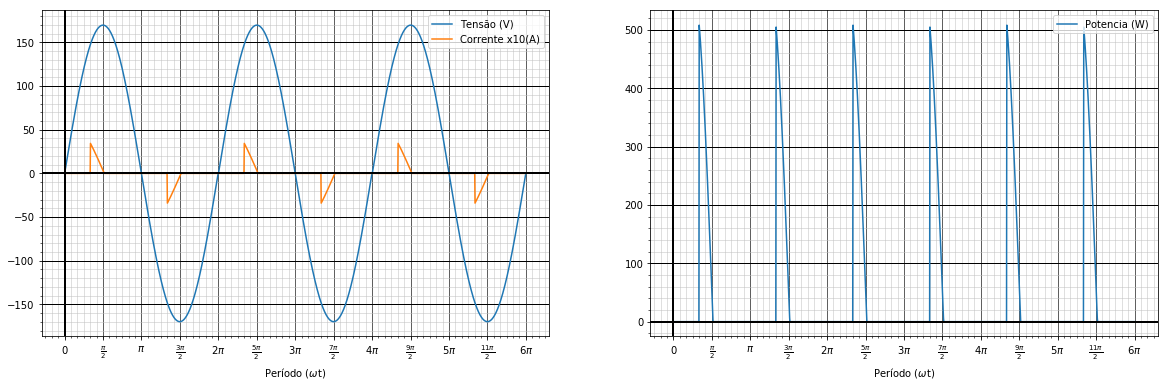

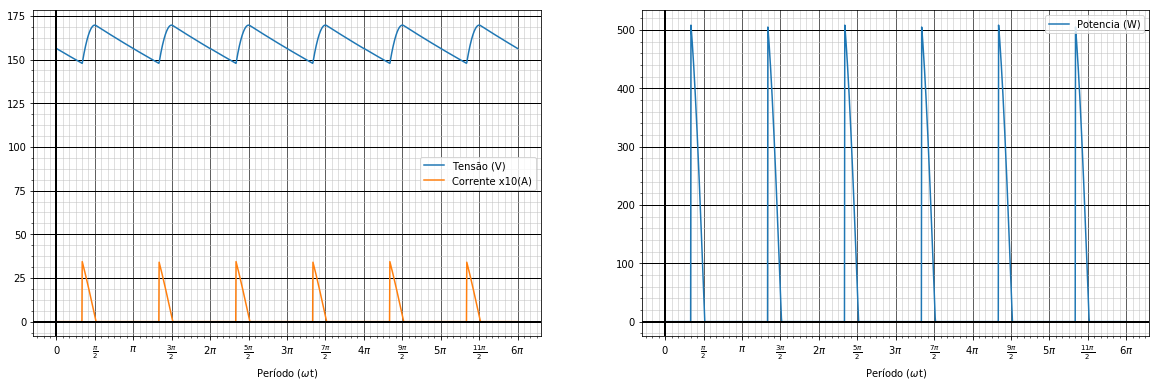

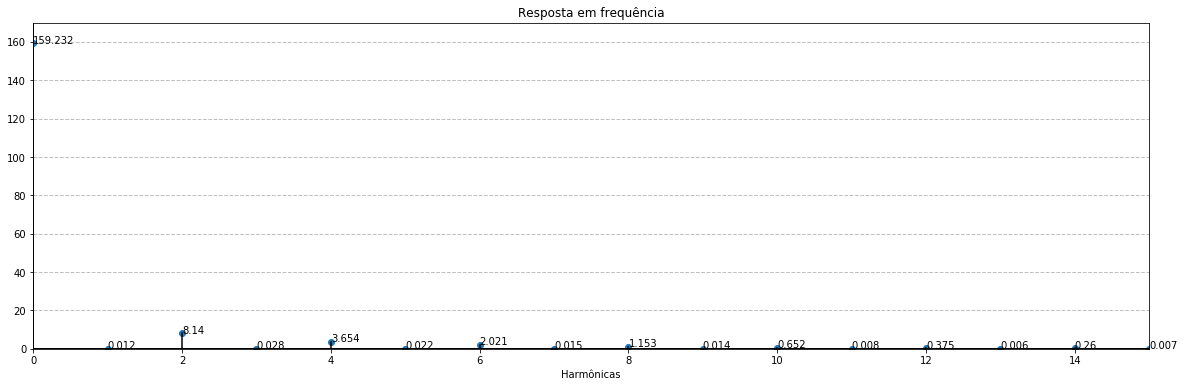

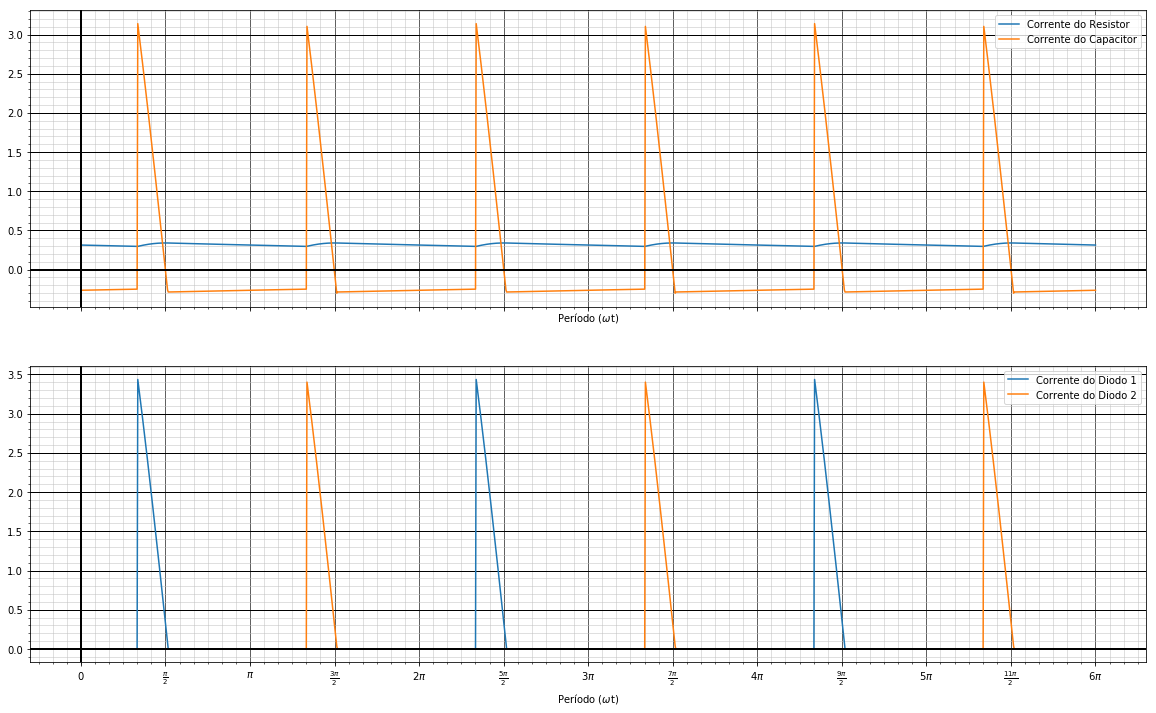

In [2]:
########## RETIFICADOR ONDA COMPLETA ############
################### CARGA RC ####################
V_pk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

func_a = sym.lambdify('x', f'sin({teta})*exp(-({pi}+x-{teta})/{w*R*C}) - sin(x)', 'numpy')
a = scipy.optimize.fsolve(func_a, 0)
a = a[0]

func_v1 = f'({V_pk}*sin({teta})*exp(-((x+{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} )) +'
func_v2 = f'({V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )) + '
func_v3 = f'({V_pk}*sin({teta})*exp(-(x-{teta})/({w*R*C})) * (heaviside(x - {teta}, 0) - heaviside(x - {pi+a}, 0) + {eps} )) +'
func_v4 = f'({V_pk}*sin(x+{pi})*( heaviside(x - {pi+a}, 0) - heaviside(x - {pi+teta}, 0) + {eps} )) +'
func_v5 = f'({V_pk}*sin({teta})*exp(-((x-{pi})-{teta})/({w*R*C}))*(heaviside(x - {pi+teta}, 0) + {eps} ))'

func_v = func_v1 + func_v2 + func_v3 + func_v4 + func_v5
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)
V_pk = calculo_pk(func_v)

func_i_c_d_on_1 = f'({w*C*V_pk}*cos(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} ))' 
func_i_c_d_on_2 = f'({w*C*V_pk}*cos(x+{pi}) * ( heaviside(x - {pi+a}, 0) - heaviside(x - {pi+teta}, 0) + {eps} ))'
func_i_c_d_off_1 = f'({-(V_pk*sin(teta))/R}*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} ))'
func_i_c_d_off_2 = f'({-(V_pk*sin(teta))/R}*exp(-(x+{pi}-{teta})/({w*R*C})) * (heaviside(x - {teta}, 0) - heaviside(x - {pi+a}, 0) + {eps} ))'
func_i_c_d_off_3 = f'({-(V_pk*sin(teta))/R}*exp(-(x-{teta})/({w*R*C})) *  heaviside(x - {pi+teta}, 0))'

func_i_c = '(' + func_i_c_d_on_1  + ')+(' +  func_i_c_d_on_2  + ')+(' +  func_i_c_d_off_1  + ')+(' +  func_i_c_d_off_2  + ')+(' +  func_i_c_d_off_3 + ')'

func_i_r = '((' + func_v + f')/{R})'

func_i_d_1 = '(' + func_i_c + '+' + func_i_r +')' + f'*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps})'
func_i_d_2 = '(' + func_i_c + '+' + func_i_r +')' + f'*( heaviside(x - {pi+a}, 0) - heaviside(x - {pi+teta}, 0) + {eps})'

func_i_d_12 = '(' + func_i_d_1  + ')+(' +  func_i_d_2  + ')'
func_i_d = '(' + func_i_d_1  + ')-(' +  func_i_d_2  + ')'

Ic_media = calculo_medio(func_i_c)
Ic_rms = calculo_rms(func_i_c)
Ic_pk = calculo_pk(func_i_c)

Ir_media = calculo_medio(func_i_r)
Ir_rms = calculo_rms(func_i_r)
Ir_pk = calculo_pk(func_i_r)

Id_media = calculo_medio(func_i_d_1)
Id_rms = calculo_rms(func_i_d_1)
Id_pk = calculo_pk(func_i_d_1)

func_p = '(' + func_v + ')*(' + func_i_d + ')'
P = calculo_medio(func_p)
S = Id_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v,   T)
thdI = calculo_thd(func_i_d, T)

print("# - Tensão na carga - #"       , "\nV_pk:\t", V_pk , "\nVm: \t", V_media , "\nVrms: \t", V_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk, "\nIm: \t", Ir_media, "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk, "\nIm: \t", Ic_media, "\nIrms: \t", Ic_rms)
print("# - Corrente no diodo - #"     , "\nIpk: \t", Id_pk, "\nIm: \t", Id_media, "\nIrms: \t", Id_rms)
print("# - Potências - #"             , "\nPpk:\t" , P_pk, "\nP: \t"  , P       , "\nS: \t"   , S)
#print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(f'({V_pk}*sin(x))', func_i_d, xlim=(0, T))
plot_info(func_v, func_i_d_12, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(20, 12), sharey=False, sharex=True)

plot_fx(func_i_r,   "Corrente do Resistor" , xlim=(0, T), ax=ax3)
plot_fx(func_i_c,   "Corrente do Capacitor", xlim=(0, T), ax=ax3)
plot_fx(func_i_d_1, "Corrente do Diodo 1"  , xlim=(0, T), ax=ax4)
plot_fx(func_i_d_2, "Corrente do Diodo 2"  , xlim=(0, T), ax=ax4)
ax3.legend()
ax4.legend()
